In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_parquet("/Users/casey/Documents/GitHub/AirFareCast/itineraries_snappy.parquet")

We used the parquet format for an efficient data storage and loading approach. Given that the dataset contains 82 million rows, Parquet is a good choice as it supports fast reading and writing.

In [3]:
df.head()

legId  searchDate  flightDate startingAirport  \
0  9ca0e81111c683bec1012473feefd28f  2022-04-16  2022-04-17             ATL   
1  98685953630e772a098941b71906592b  2022-04-16  2022-04-17             ATL   
2  98d90cbc32bfbb05c2fc32897c7c1087  2022-04-16  2022-04-17             ATL   
3  969a269d38eae583f455486fa90877b4  2022-04-16  2022-04-17             ATL   
4  980370cf27c89b40d2833a1d5afc9751  2022-04-16  2022-04-17             ATL   

  destinationAirport fareBasisCode travelDuration  elapsedDays  \
0                BOS      LA0NX0MC        PT2H29M            0   
1                BOS      LA0NX0MC        PT2H30M            0   
2                BOS      LA0NX0MC        PT2H30M            0   
3                BOS      LA0NX0MC        PT2H32M            0   
4                BOS      LA0NX0MC        PT2H34M            0   

   isBasicEconomy  isRefundable  ...  segmentsArrivalTimeEpochSeconds  \
0           False         False  ...                       1650223560   
1           False         False  ...                       1650200400   
2           False         False  ...                       1650218700   
3           False         False  ...                       1650227460   
4           False         False  ...                       1650213180   

          segmentsArrivalTimeRaw  segmentsArrivalAirportCode  \
0  2022-04-17T15:26:00.000-04:00                         BOS   
1  2022-04-17T09:00:00.000-04:00                         BOS   
2  2022-04-17T14:05:00.000-04:00                         BOS   
3  2022-04-17T16:31:00.000-04:00                         BOS   
4  2022-04-17T12:33:00.000-04:00                         BOS   

   segmentsDepartureAirportCode  segmentsAirlineName segmentsAirlineCode  \
0                           ATL                Delta                  DL   
1                           ATL                Delta                  DL   
2                           ATL                Delta                  DL   
3                           ATL                Delta                  DL   
4                           ATL                Delta                  DL   

  segmentsEquipmentDescription segmentsDurationInSeconds segmentsDistance  \
0                  Airbus A321                      8940              947   
1                  Airbus A321                      9000              947   
2               Boeing 757-200                      9000              947   
3                  Airbus A321                      9120              947   
4                  Airbus A321                      9240              947   

  segmentsCabinCode  
0             coach  
1             coach  
2             coach  
3             coach  
4             coach  

[5 rows x 27 columns]

The dataset consists of 27 columns related to flight details, it includes flight dates, starting and destination airports, ticket pricing, airline information, among other variables.

In [4]:
# Departure in datetime format
df['flightDate'] = pd.to_datetime(df['flightDate'])

In [5]:
#Check first date and last date
print(df['flightDate'].min())
print(df['flightDate'].max())

2022-04-17 00:00:00
2022-11-19 00:00:00


We converted the flight date to a datetime format for the time-based analysis. Ater we checked the minimum and maximum date to get an understanding of the dataset’s time span. The dataset covers flights from April 17, 2022 to November 19, 2022. This confirms that the dataset spans 7 months, which is useful for time-series analysis.

In [6]:
# Stratified on departure date
df['strata'] = df['flightDate'].dt.to_period('M')

Here we created a new column grouping flights by month. It converts the flight date into a period format, meaning that flights within the same month are treated as a single unit.

In [7]:
# 500,000 rows
fraction = 500000 / len(df)

sampled_df = df.groupby('strata', group_keys=False).apply(
    lambda x: x.sample(frac=fraction, random_state=42)
)

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_1121/303137903.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby('strata', group_keys=False).apply(


Instead of selecting 500,000 random rows, we sampled proportionally per month. We grouped by strata to ensure that each month contributes to the sample based on its share of the total dataset. The random state ensured that results continue to be reproducible.

In [8]:
print(f"Sample size: {len(sampled_df)}")

Sample size: 500001


The output 500,001 suggests that one extra row was included in the sample, likely due to rounding when calculating the fraction per month.

In [9]:
sampled_df = pd.read_csv("/Users/casey/Documents/GitHub/AirFareCast/itineraries_sample_500.csv")

In [10]:
sampled_df.to_csv('itineraries_sample_500.csv', index=False)

In [11]:
pd.options.display.float_format = '{:.2f}'.format

# Display summary statistics
df.describe()

flightDate  elapsedDays    baseFare   totalFare  \
count                       82138753  82138753.00 82138753.00 82138753.00   
mean   2022-08-09 17:46:02.318820608         0.15      292.66      340.39   
min              2022-04-17 00:00:00         0.00        0.01       19.59   
25%              2022-07-02 00:00:00         0.00      159.00      197.10   
50%              2022-08-14 00:00:00         0.00      260.47      305.20   
75%              2022-09-18 00:00:00         0.00      398.14      452.09   
max              2022-11-19 00:00:00         2.00     7662.33     8260.61   
std                              NaN         0.36      183.19      196.03   

       seatsRemaining  totalTravelDistance  
count     82138753.00          76044221.00  
mean             5.98              1609.90  
min              0.00                89.00  
25%              4.00               878.00  
50%              7.00              1468.00  
75%              9.00              2415.00  
max             10.00              7252.00  
std              2.88               857.33

Flight Date Range: April 17, 2022 – November 19, 2022.
Elapsed Days: Most values are 0, meaning tickets were booked close to the flight date.

Base Fare:
- Mean: $292.66
- Min: $0.01 
- Max: $7,662.33 Due to likely premium or last-minute fares.
- Total Fare: Similar distribution to base fare, with a maximum of $8,260.61.

Seats Remaining:
- Mean: 5.98 seats
- Min: 0 seats 
- Max: 10 seats

Total Travel Distance:
- Mean: 1,609.9 miles.
- Max: 7,252 miles.

Most tickets were booked very close to the flight date, explaining the 0 elapsed days for most records. Fares are right-skewed, meaning a few expensive flights inflate the average. Some fares appear extremely low ($0.01), which may be data errors or promotions. Further filtering may be needed to handle potential data entry errors.

In [12]:
# Basic info
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82138753 entries, 0 to 82138752
Data columns (total 28 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   legId                              object        
 1   searchDate                         object        
 2   flightDate                         datetime64[ns]
 3   startingAirport                    object        
 4   destinationAirport                 object        
 5   fareBasisCode                      object        
 6   travelDuration                     object        
 7   elapsedDays                        int64         
 8   isBasicEconomy                     bool          
 9   isRefundable                       bool          
 10  isNonStop                          bool          
 11  baseFare                           float64       
 12  totalFare                          float64       
 13  seatsRemaining                     int64 

The dataset contains 82,138,753 entries across 28 columns.

Data types:
- Categorical variables: Airports, fare basis codes, and cabin codes.
- Boolean variables: Economy class, refundability, and whether the flight is non-stop.
- Datetime variables: Flight date.
- Numerical variables: Base fare, total fare, seats remaining, travel distance.

In [13]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
                                   legId  searchDate  \
count                           82138753    82138753   
unique                           5999739         171   
top     318ae5fe46ac6a4ed5e1ee55f5b53677  2022-07-05   
freq                                  61      747995   
mean                                 NaN         NaN   
min                                  NaN         NaN   
25%                                  NaN         NaN   
50%                                  NaN         NaN   
75%                                  NaN         NaN   
max                                  NaN         NaN   
std                                  NaN         NaN   

                           flightDate startingAirport destinationAirport  \
count                        82138753        82138753           82138753   
unique                            NaN              16                 16   
top                               NaN             LAX                LAX   
fr

LAX is the busiest airport in the dataset, dominating both departures and arrivals. Most searches occurred on July 5, 2022, suggesting peak travel interest. Most flights are economy class and non-refundable, aligning with typical airline pricing models. American Airlines has the most flights, and Boeing 737-800 is the most common aircraft. Most flights are booked on the same day of departure, reinforcing a focus on last-minute searches.

In [14]:
# Checking for any missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
legId                                      0
searchDate                                 0
flightDate                                 0
startingAirport                            0
destinationAirport                         0
fareBasisCode                              0
travelDuration                             0
elapsedDays                                0
isBasicEconomy                             0
isRefundable                               0
isNonStop                                  0
baseFare                                   0
totalFare                                  0
seatsRemaining                             0
totalTravelDistance                  6094532
segmentsDepartureTimeEpochSeconds          0
segmentsDepartureTimeRaw                   0
segmentsArrivalTimeEpochSeconds            0
segmentsArrivalTimeRaw                     0
segmentsArrivalAirportCode                 0
segmentsDepartureAirportCode               0
segmentsAirlineName                   

Some columns have missing values like price or flight date, which means they may need to be handled.

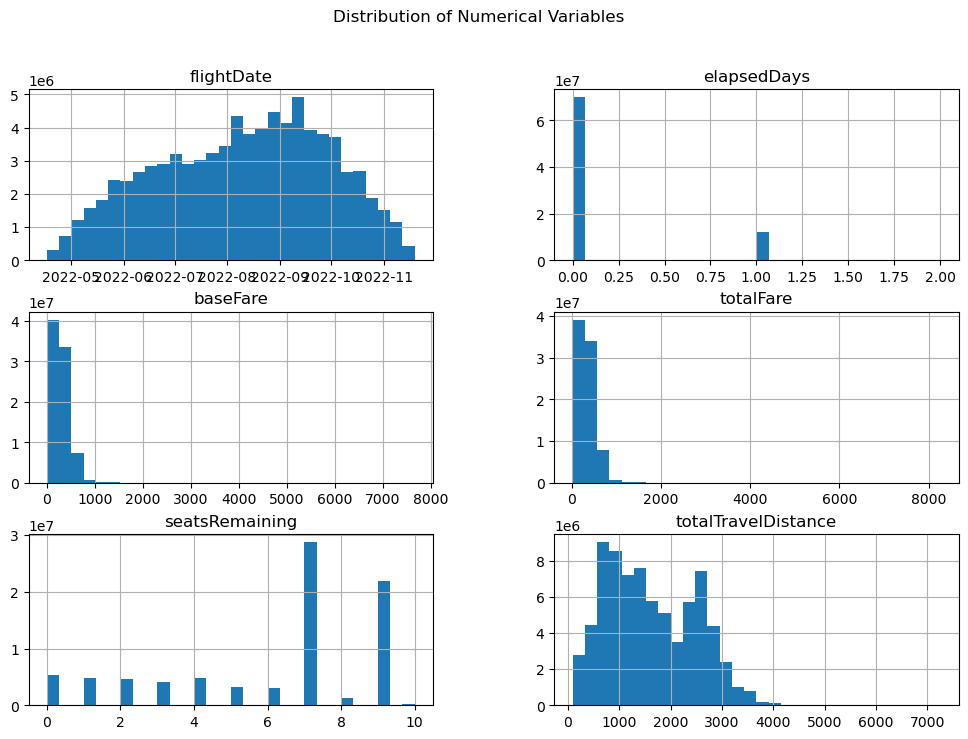

In [15]:
# Distribution of the numerical variables
df.hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribution of Numerical Variables")
plt.show()

Flight dates are well-distributed across the dataset. Base fares and total fares are right-skewed, meaning most fares are low, but with some extremely values. Flight distance shows distinct peaks, possibly corresponding to common domestic and long routes.

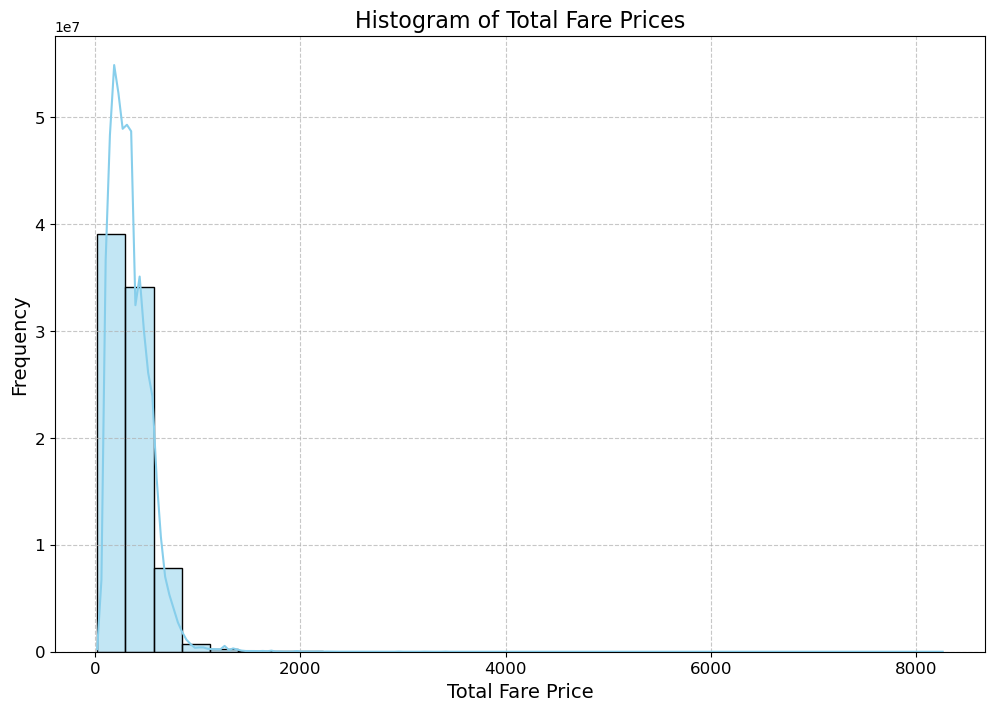

In [ ]:
# Total Fare Prices
from matplotlib.ticker import ScalarFormatter

plt.figure(figsize=(12, 8))
sns.histplot(df['totalFare'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title("Histogram of Total Fare Prices", fontsize=16)
plt.xlabel("Total Fare Price", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.show()

Travelers should book in the lower fare range from $200-$500 to avoid overpaying. High-end outliers likely represent premium cabins or last-minute bookings.

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_1121/1229000827.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(y_tick // 60)}h' for y_tick in y_ticks])


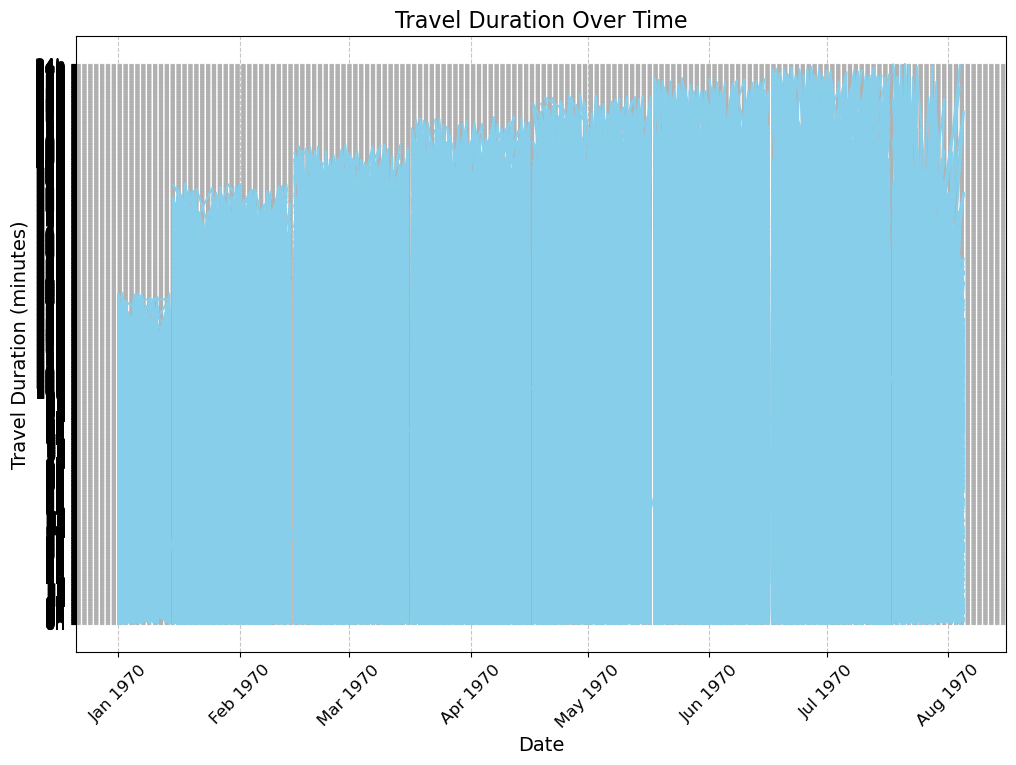

In [23]:
import matplotlib.dates as mdates
import matplotlib as mpl

# Set the value of rcParams['agg.path.chunksize'] to be greater than 100
mpl.rcParams['agg.path.chunksize'] = 10000

# Line graph of Travel Duration
plt.figure(figsize=(12, 8))
plt.plot(sampled_df['flightDate'], sampled_df['travelDuration'], color='skyblue')
plt.title("Travel Duration Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Travel Duration (minutes)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Convert travel duration from minutes to hours for the y-axis
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(y_tick // 60)}h' for y_tick in y_ticks])

# Format the x-axis to show only months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.show()

Duration values are spread widely, but data might is misaligned due to incorrect datetime parsing. Fixing the date format is necessary before drawing meaningful conclusions.

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_1121/1406523802.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='seatsRemaining', data=df, palette='viridis')


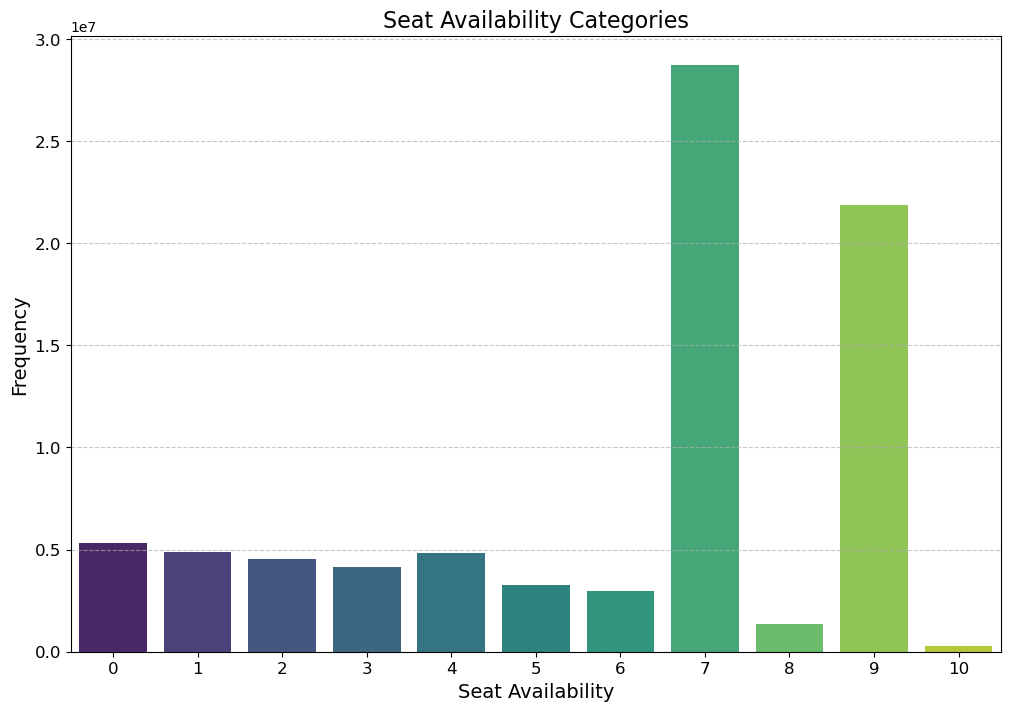

In [24]:
# Bar Chart of Seat Availability Categories
plt.figure(figsize=(12, 8))
sns.countplot(x='seatsRemaining', data=df, palette='viridis')
plt.title("Seat Availability Categories", fontsize=16)
plt.xlabel("Seat Availability", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Seat availability is highest at 7 and 9 seats, meaning many flights have these seat counts still open. Dynamic pricing likely kicks in as seat availability drops. Flights with 0 seats available still appear in the dataset, possibly due to last-minute cancellations or adjustments. Most flights appear to have a moderate number of available seats, suggesting competitive booking trends.

In [25]:
# Line Plot of Fare Prices Over Time
plt.figure(figsize=(12, 8))
sns.lineplot(x='flightDate', y='totalFare', data=df, color='skyblue')
plt.title("Total Fare Prices Over Time", fontsize=16)
plt.xlabel("Flight Date", fontsize=14)
plt.ylabel("Total Fare Price ($)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# y-axis labels to include the dollar sign
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])

plt.show()

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_1121/2326053518.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])


Prices appear to fluctuate significantly on a daily basis, and a general decline in average ticket prices is visible from May to November 2022. Despite the downward trend, there are periodic spikes, likely indicating peak travel days.Prices are not stable over time and are influenced by seasonality, demand, and promotions.

In [26]:
# Ensure 'flightDate' is in datetime format
df['flightDate'] = pd.to_datetime(df['flightDate'])

# Create a new column 'dayOfWeek' in the dataframe
df['dayOfWeek'] = df['flightDate'].dt.day_name()

# Boxplot of Prices by Day of the Week
plt.figure(figsize=(12, 8))
sns.boxplot(x='dayOfWeek', y='totalFare', data=df, palette='viridis')
plt.title("Total Fare Prices by Day of the Week", fontsize=16)
plt.xlabel("Day of the Week", fontsize=14)
plt.ylabel("Total Fare Price ($)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Format the y-axis labels to include the dollar sign
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])

plt.show()

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_1121/1558002836.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dayOfWeek', y='totalFare', data=df, palette='viridis')
/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_1121/1558002836.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])


Prices remain relatively stable across all days, but Sundays have slightly higher fares. Tuesdays and Wednesdays seem to be the cheapest days to fly. Weekend fares, particularly Sundays, tend to be more expensive.

In [27]:
# Boxplot of Prices by month
plt.figure(figsize=(12, 8))
sns.boxplot(x='strata', y='totalFare', data=df, palette='viridis')
plt.title("Total Fare Prices by Month", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Total Fare Price ($)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)

# Format the y-axis labels to include the dollar sign
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])

plt.show()

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_1121/955970417.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='strata', y='totalFare', data=df, palette='viridis')
/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_1121/955970417.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])


During the peak months of June and July there are higher fares, confirming seasonal price increases. Outliers exist in every month, indicating some expensive flights year-round. Travelers can save money by flying in fall months when fares decline.

In [28]:
# Bar Chart of Airline vs. Average Fare
plt.figure(figsize=(12, 8))
sns.barplot(x='segmentsAirlineName', y='totalFare', data=df, palette='viridis')
plt.title("Average Fare by Airline", fontsize=16)
plt.xlabel("Airline", fontsize=14)
plt.ylabel("Average Fare Price ($)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Format the y-axis labels to include the dollar sign
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])

plt.show()

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_1121/2121949528.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='segmentsAirlineName', y='totalFare', data=df, palette='viridis')
/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_1121/2121949528.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])


Some airlines consistently have higher fares, while others remain budget-friendly. Certain airlines show large variations, likely due to differences in fare classes, routes, and demand. Airline selection heavily impacts price, meaning travelers can save significantly by choosing budget carriers.

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_1121/1998902150.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='segmentsCabinCode', y='totalFare', data=sampled_df, palette='viridis')
/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_1121/1998902150.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])


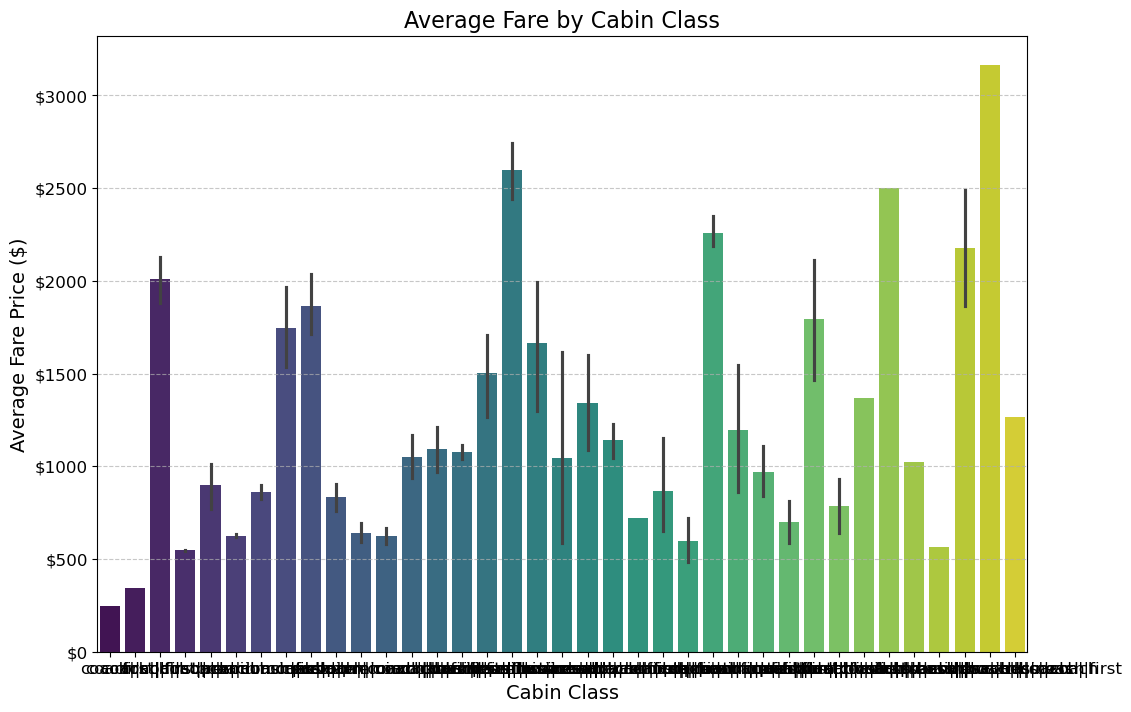

In [30]:
# Bar Chart of Cabin Class vs. Price
plt.figure(figsize=(12, 8))
sns.barplot(x='segmentsCabinCode', y='totalFare', data=sampled_df, palette='viridis')
plt.title("Average Fare by Cabin Class", fontsize=16)
plt.xlabel("Cabin Class", fontsize=14)
plt.ylabel("Average Fare Price ($)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Format the y-axis labels to include the dollar sign
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])

plt.show()

As expected, first-class fares are significantly higher than economy fares. There are large variations within each class, likely due to different routes, demand, and dynamic pricing. Upgrading from economy to business class can be expensive, but there may be opportunities for discounted upgrades.

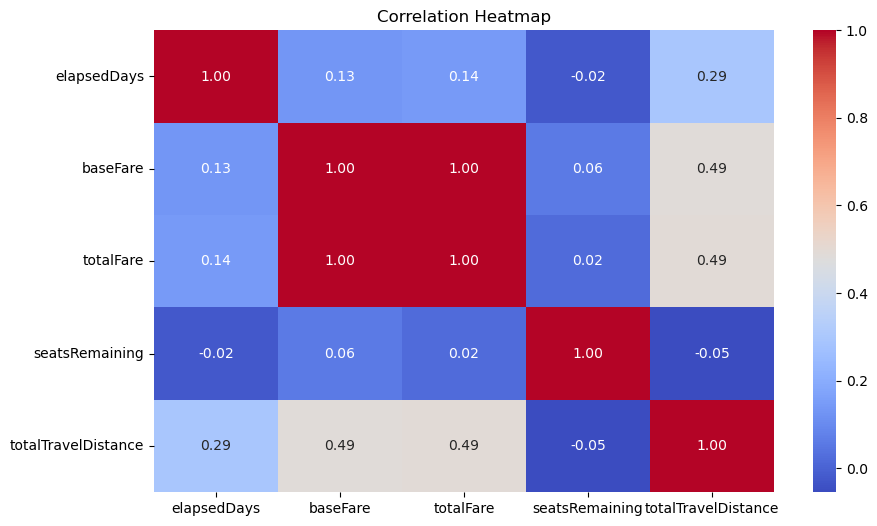

In [31]:
# Correlations
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [32]:
# Heatmap of Feature Correlations
plt.figure(figsize=(12, 8))
numeric_cols = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlations Heatmap", fontsize=16)
plt.show()

Total fare is strongly correlated with travel distance, but not perfectly. On another note seats remaining have a minimal impact on pricing, suggesting airlines use other factors to set ticket prices. In terms of elapsed days, it has a weak positive correlation with price, meaning later bookings generally cost more.

The strongest predictor of price is distance, but pricing is also highly dynamic. The base fare and total fare are nearly identical, meaning that extra fees and taxes have little influence on price variation.

In [ ]:
# Scatter Plot of Distance vs. Price
plt.figure(figsize=(12, 8))
sns.scatterplot(x='totalTravelDistance', y='totalFare', data=df, color='skyblue')
plt.title("Distance vs. Total Fare Price", fontsize=16)
plt.xlabel("Distance (miles)", fontsize=14)
plt.ylabel("Total Fare Price ($)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Format the y-axis labels to include the dollar sign
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])

plt.show()

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_23005/2576625433.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])


While prices generally increase with distance, there is a wide range of fares for similar distances. We can see that flights under 1,000 miles have highly varied pricing, with some expensive outliers. For long-haul flights over 3,000 tend to cluster in the higher price range, but still have variability.

Pricing is not purely based on distance other factors like demand, airline competition, and booking class significantly influences fares. Premium class tickets for long-haul flights drive the upper range of fare prices.

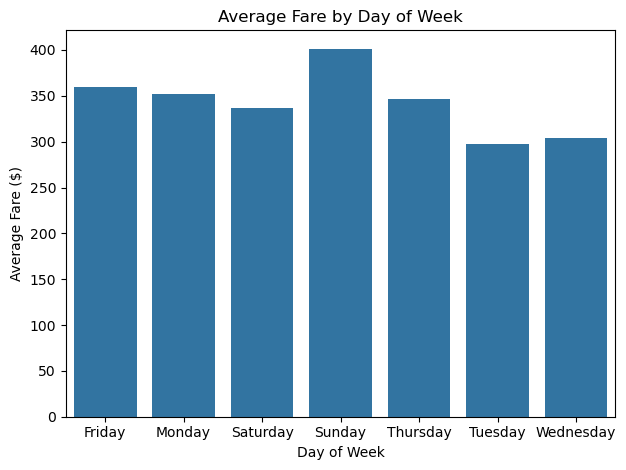

In [35]:
# Price Distribution by Day of Week
avg_price_by_day = df.groupby('dayOfWeek')['totalFare'].mean().dropna()
sns.barplot(x=avg_price_by_day.index, y=avg_price_by_day.values)
plt.title('Average Fare by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Fare ($)')
plt.tight_layout()
plt.show()

Sunday has the highest fares, suggesting it is the most expensive day to fly. Tuesday and Wednesday have the lowest fares, while Friday and Monday are slightly more expensive, indicating higher demand for business and leisure travel.Flying midweek is cheaper, making it a good time for budget-conscious travelers.

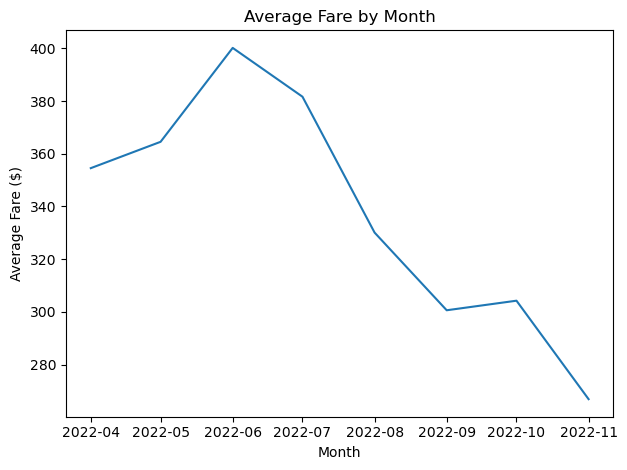

In [37]:
# Price Distribution by Month
avg_price_by_month = df.groupby('strata')['totalFare'].mean().dropna()
# Convert strata index to datetime
avg_price_by_month.index = avg_price_by_month.index.to_timestamp()
sns.lineplot(x=avg_price_by_month.index, y=avg_price_by_month.values)
plt.title('Average Fare by Month')
plt.xlabel('Month')
plt.ylabel('Average Fare ($)')
plt.tight_layout()
plt.show()

June has the highest average fare of around $400, indicating peak summer travel season. Fares steadily decline from July to November, reaching their lowest in November $270.The sharp drop in August and September suggests a post-summer dip in travel demand.

We can se that June and July are peak travel months, likely due to summer vacations and holidays. Late fall sees the lowest fares, possibly due to reduced demand before holiday travel picks up.

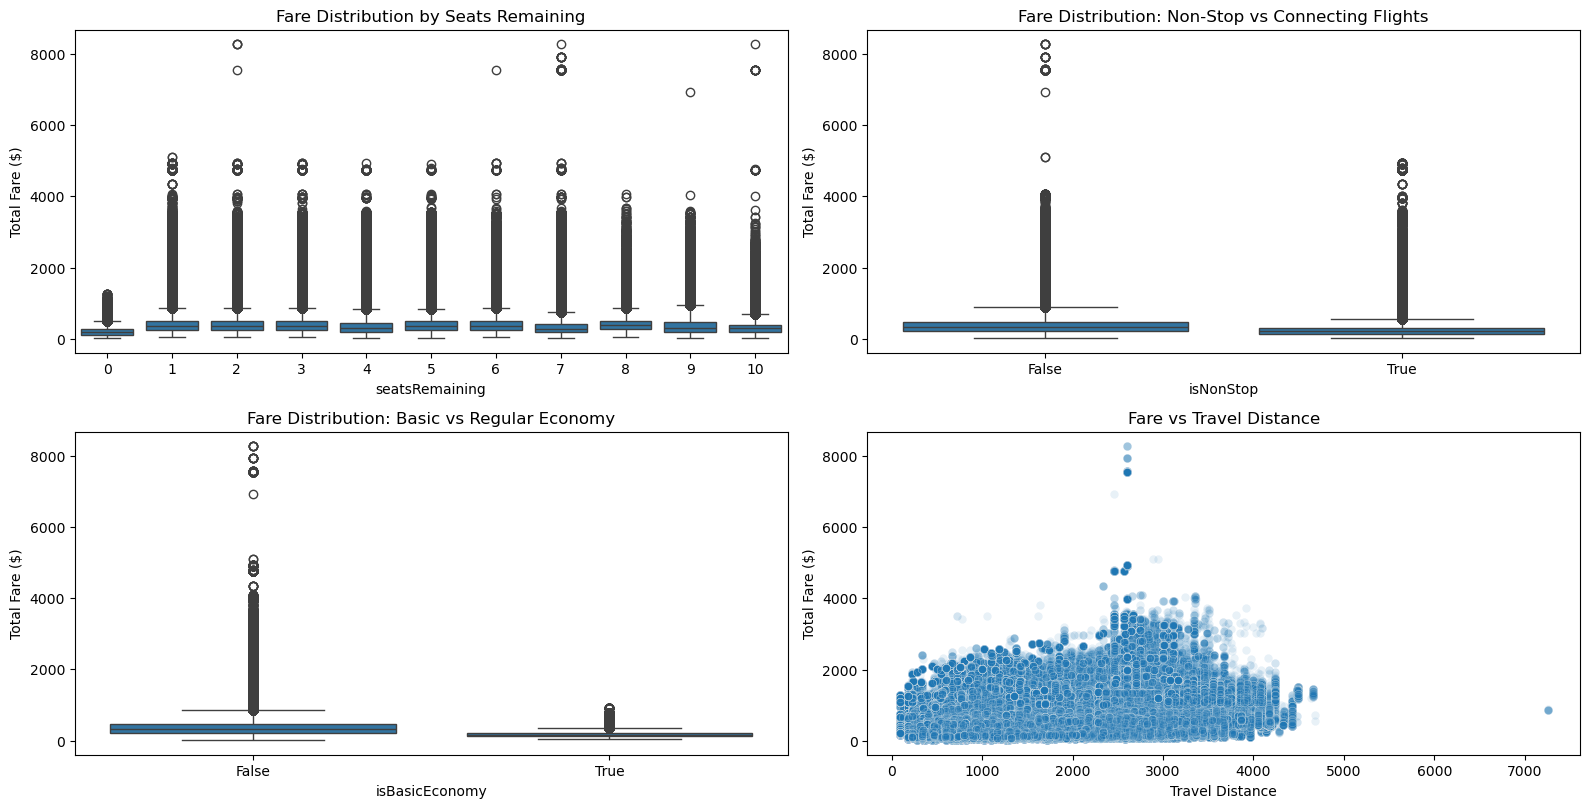

In [6]:
# Price vs Seats Remaining
plt.figure(figsize=(16, 12))

plt.subplot(3, 2, 3)
sns.boxplot(x='seatsRemaining', y='totalFare', data=df)
plt.title('Fare Distribution by Seats Remaining')
plt.ylabel('Total Fare ($)')

# Non-Stop vs Connecting Flight Prices
plt.subplot(3, 2, 4)
sns.boxplot(x='isNonStop', y='totalFare', data=df)
plt.title('Fare Distribution: Non-Stop vs Connecting Flights')
plt.ylabel('Total Fare ($)')

# Basic Economy vs Regular Economy Prices
plt.subplot(3, 2, 5)
sns.boxplot(x='isBasicEconomy', y='totalFare', data=df)
plt.title('Fare Distribution: Basic vs Regular Economy')
plt.ylabel('Total Fare ($)')

# Price vs Distance
plt.subplot(3, 2, 6)
sns.scatterplot(x='totalTravelDistance', y='totalFare', data=df, alpha=0.1)
plt.title('Fare vs Travel Distance')
plt.xlabel('Travel Distance')
plt.ylabel('Total Fare ($)')

plt.tight_layout()
plt.show()

 Distribution by Seats Remaining:
- Seat availability does not have a strong impact on fare pricing.
- Price outliers exist across all categories, likely due to route, demand, or premium seating.

Non-Stop vs. Connecting Flights:
- Non-stop flights are priced higher due to convenience and demand.
- Connecting flights offer more variability, likely due to stopover duration and route pricing strategies.
- Passengers looking for budget options may benefit from layovers.



Basic vs. Regular Economy:
- Basic Economy is a predictable low-cost option, but has more restrictions.
- Regular Economy includes premium seating and last-minute bookings, driving fare spikes.
- Passengers looking for the lowest fare should stick to Basic Economy but be aware of limitations such as no seat selection or no refunds.

Fare vs. Travel Distance:
- Longer flights generally cost more, but pricing is not purely distance-based.
- Some short-haul flights are expensive, likely driven by business travelers and monopolized routes.

In [17]:
print("Detailed Price Analysis:")

# Price statistics by flight type
nonstop_stats = df[df['isNonStop']]['totalFare'].describe()
connecting_stats = df[~df['isNonStop']]['totalFare'].describe()

print("\nNon-Stop Flight Prices:")
print(nonstop_stats)
print("\nConnecting Flight Prices:")
print(connecting_stats)

# Price variation by number of seats remaining
print("\nAverage Prices by Seats Remaining:")
print(df.groupby('seatsRemaining')['totalFare'].mean().round(2))

# Price percentiles
percentiles = [0.1, 0.25, 0.5, 0.75, 0.9]
price_percentiles = df['totalFare'].quantile(percentiles)
print("\nPrice Percentiles:")
for p, value in zip(percentiles, price_percentiles):
    print(f"{int(p*100)}th percentile: ${value:.2f}")

# Price variability metrics
print("\nPrice Variability Metrics:")
print(f"Standard Deviation: ${df['totalFare'].std():.2f}")
print(f"Coefficient of Variation: {(df['totalFare'].std() / df['totalFare'].mean() * 100):.1f}%")

# Markup analysis
df['markup_percentage'] = ((df['totalFare'] - df['baseFare']) / df['baseFare'] * 100)
print("\nMarkup Analysis:")
print(f"Average Markup: {df['markup_percentage'].mean():.1f}%")
print(f"Median Markup: {df['markup_percentage'].median():.1f}%")
print(f"Maximum Markup: {df['markup_percentage'].max():.1f}%")

Detailed Price Analysis:

Non-Stop Flight Prices:
count    2.206689e+07
mean     2.511486e+02
std      1.644708e+02
min      1.959000e+01
25%      1.486000e+02
50%      2.156000e+02
75%      3.136000e+02
max      4.923600e+03
Name: totalFare, dtype: float64

Connecting Flight Prices:
count    6.007186e+07
mean     3.731677e+02
std      1.964863e+02
min      3.208000e+01
25%      2.251000e+02
50%      3.486200e+02
75%      4.886000e+02
max      8.260610e+03
Name: totalFare, dtype: float64

Average Prices by Seats Remaining:
seatsRemaining
0     206.57
1     400.88
2     393.93
3     394.01
4     343.31
5     389.03
6     389.54
7     320.74
8     408.70
9     345.47
10    325.85
Name: totalFare, dtype: float64

Price Percentiles:
10th percentile: $133.60
25th percentile: $197.10
50th percentile: $305.20
75th percentile: $452.09
90th percentile: $578.60

Price Variability Metrics:
Standard Deviation: $196.03
Coefficient of Variation: 57.6%

Markup Analysis:
Average Markup: 38.6%
Median M

Non-Stop Flights:
- Mean Price: $251.15
- Median Price: $215.60
- Standard Deviation: $164.47
- Max Price: $4,923.60

Connecting Flights:
- Mean Price: $373.17 
- Median Price: $348.62
- Standard Deviation: $196.48
- Max Price: $8,260.61

Connecting flights are more expensive on average than non-stop flights. Higher standard deviation in connecting flights suggests that pricing is influenced by factors such as layover duration, route complexity, and airline partnerships.
Some high outliers like with a price of $4,923 for non-stop, $8,260 for connecting flights, likely represent business-class or last-minute fares.

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_75228/1470885132.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])


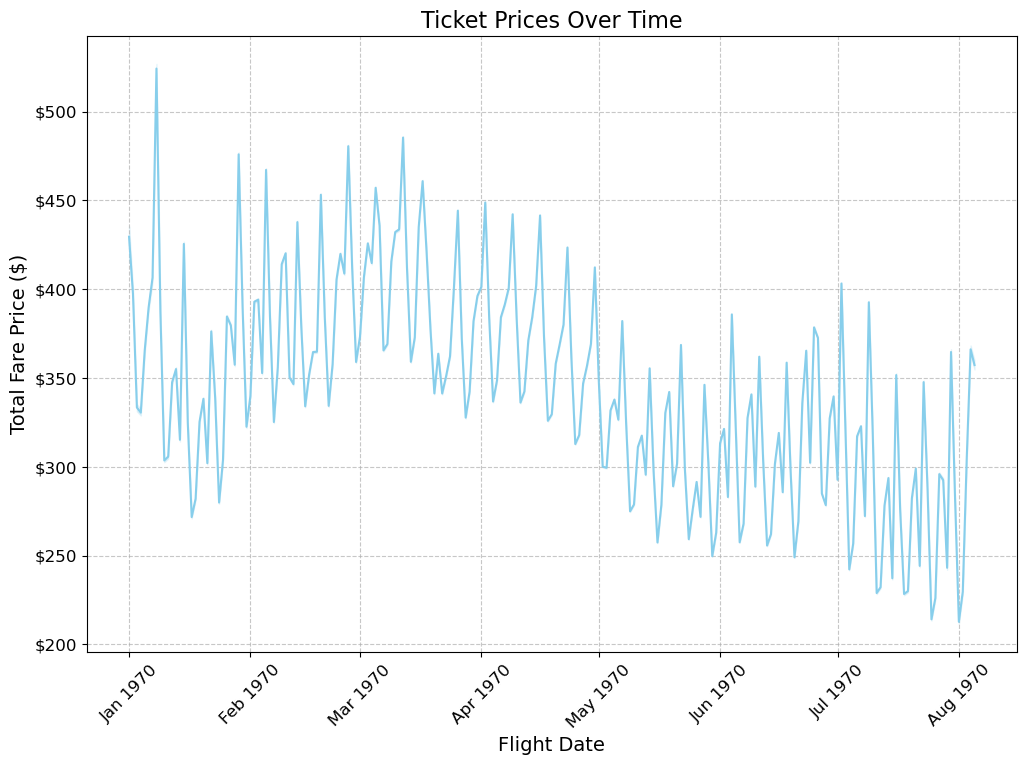

In [8]:
# Time series plot of ticket prices leading up to departure
plt.figure(figsize=(12, 8))
sns.lineplot(x='flightDate', y='totalFare', data=df, color='skyblue')
plt.title("Ticket Prices Over Time", fontsize=16)
plt.xlabel("Flight Date", fontsize=14)
plt.ylabel("Total Fare Price ($)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Format the y-axis labels to include the dollar sign
y_ticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'${int(y_tick)}' for y_tick in y_ticks])

import matplotlib.dates as mdates

# Format the x-axis to show only months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)
plt.show()


Prices appear to fluctuate significantly on a daily basis, and a general decline in average ticket prices is visible from May to November 2022. Despite the downward trend, there are periodic spikes, likely indicating peak travel days.Prices are not stable over time and are influenced by seasonality, demand, and promotions.

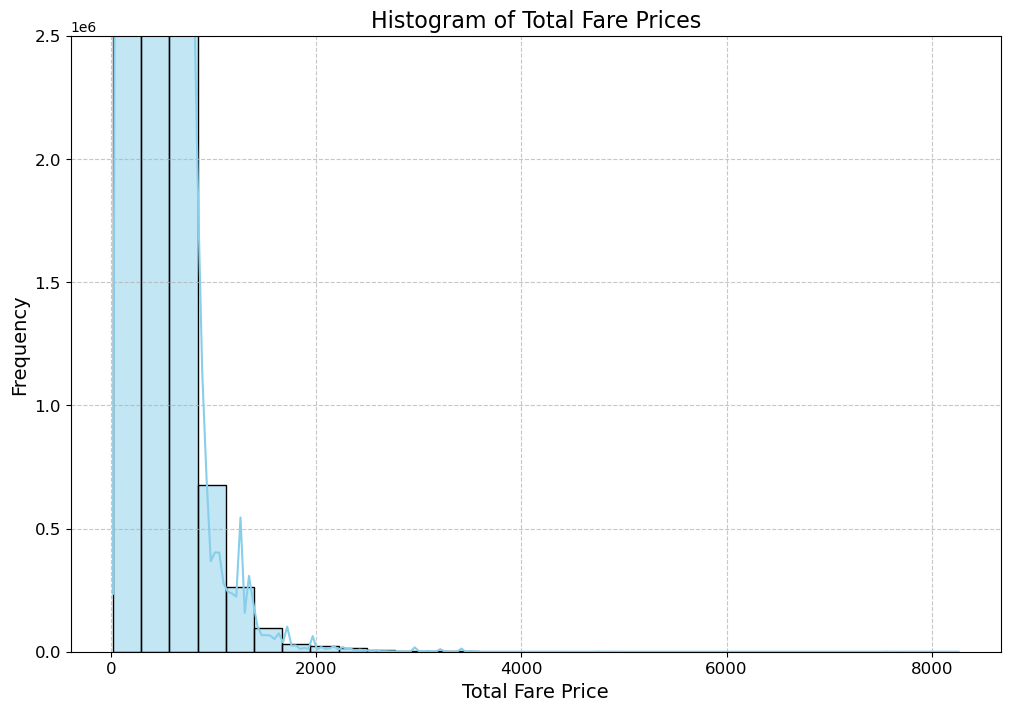

In [28]:
# Histogram of total fares to visualize price distribution
plt.figure(figsize=(12, 8))
sns.histplot(df['totalFare'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title("Histogram of Total Fare Prices", fontsize=16)
plt.xlabel("Total Fare Price", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.ylim(0, 2500000)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The distribution is highly right-skewed, meaning most flights are cheap, but there are some very expensive ones. We saw that the majority of flights cost below $500. A small number of flights exceed $4,000-$8,000, and they are likely business class tickets or last-minute bookings.

In [31]:
# Boxplot of fare prices by airline to show airline-specific trends
# Get the top 15 airlines by the number of flights
top_15_airlines = df['segmentsAirlineName'].value_counts().nlargest(15).index

# Filter the dataframe to include only the top 15 airlines
top_15_df = df[df['segmentsAirlineName'].isin(top_15_airlines)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='segmentsAirlineName', y='totalFare', data=top_15_df, palette='viridis')
plt.title("Total Fare Prices by Airline (Top 15)", fontsize=16)
plt.xlabel("Airline", fontsize=14)
plt.ylabel("Total Fare Price ($)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.show()

/var/folders/4g/7cwxt52n09sb7vzyh6tzj3w00000gn/T/ipykernel_75806/2572991911.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='segmentsAirlineName', y='totalFare', data=top_15_df, palette='viridis')


: 

The median price for most airlines is relatively low, around a few hundred dollars and we noticed there are many outliers, indicating that some flights can cost significantly more. Some airlines show a wider interquartile range, meaning they have more variability in pricing. The presence of multi-airline combinations suggests that codeshare flights exist, potentially leading to higher fares.

While most flights are within a reasonable price range, premium and business-class seats may contribute to high outliers.
Budget airlines like Spirit and JetBlue seem to have lower fare distributions compared to other airlines like Delta and United.